# The goal of this notebook is to predict the presence of heart disease in the patient.
### Author: Abhisek Saha
### Data: https://www.kaggle.com/ronitf/heart-disease-uci
#### Project idea: Siddhardhan youtube channel

In [1]:
!ls

HeartDiseasePrediction.ipynb  heart.csv


In [2]:
# Getting the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset into pandas dataframe
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# The shape of the data
df.shape

(303, 14)

# EDA

In [5]:
# Getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### All the entries are numerical, there are 12 features and 1 target column

In [6]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There is no null values in the dataset

In [7]:
# Getting the description of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


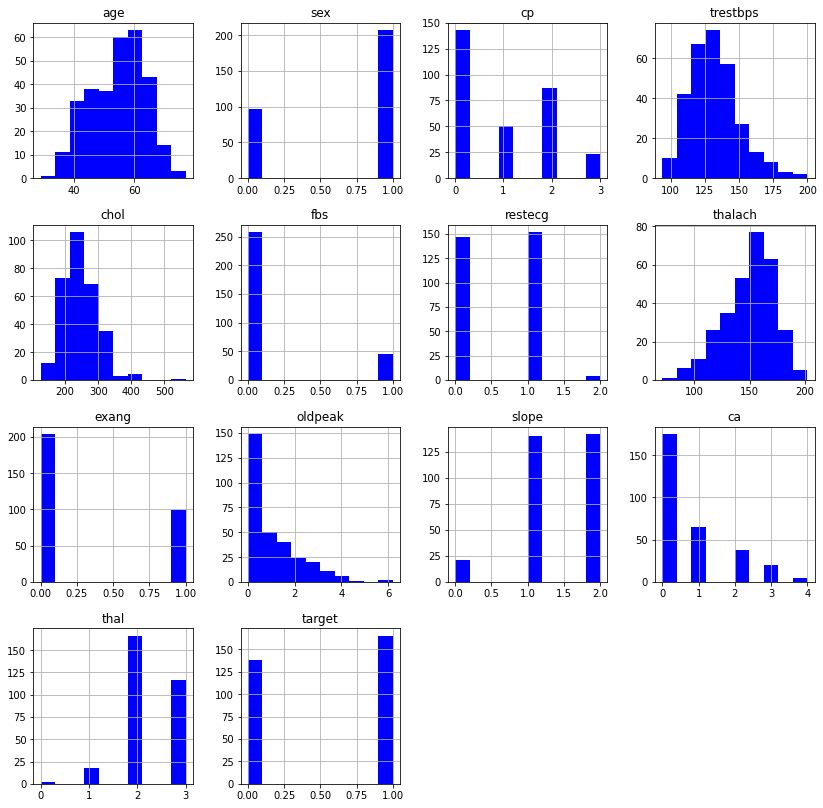

In [8]:
# Checking the distribution of the data
#plt.figure(figsize=(14,14))
df.hist(bins=10, color='blue', figsize=(14,14))
plt.show()

In [9]:
# checking the correlations
corr_mat = df.corr()

In [10]:
corr_mat['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [13]:
print("The shape of X_train=", X_train.shape)
print("The shape of X_test =", X_test.shape)
print("The shape of y_train=", y_train.shape)
print("The shape of y_test =", y_test.shape)

The shape of X_train= (242, 13)
The shape of X_test = (61, 13)
The shape of y_train= (242,)
The shape of y_test = (61,)


In [14]:
# Normilize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training model and testing

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [16]:
models = []
Scores = {}
Names = []

models.append( ( 'LR', LogisticRegression() ))
models.append( ( 'KNN', KNeighborsClassifier() ))
models.append( ( 'DT', DecisionTreeClassifier() ))
models.append( ( 'RF', RandomForestClassifier() ))
models.append( ( 'ETR', ExtraTreesClassifier() ))
models.append( ( 'GBR', GradientBoostingClassifier() ))

for name, model in models:
    Names.append(name)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    Scores[name] = accuracy_score(y_test, pred)

In [17]:
Scores

{'LR': 0.7868852459016393,
 'KNN': 0.819672131147541,
 'DT': 0.7540983606557377,
 'RF': 0.7868852459016393,
 'ETR': 0.7704918032786885,
 'GBR': 0.7377049180327869}

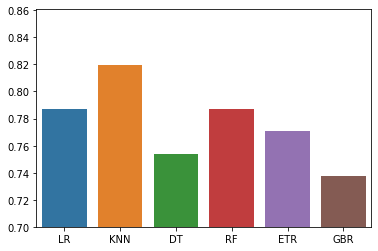

In [18]:
sns.barplot(x=list(Scores.keys()), y=list(Scores.values()) )
plt.ylim(0.7,)
plt.show()

#### KNN is giving the highest accuracy

In [19]:
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print(classification_report(y_test, pred_knn, target_names=["No Heart Disease", "Have Heart Disease"]))

                    precision    recall  f1-score   support

  No Heart Disease       0.79      0.82      0.81        28
Have Heart Disease       0.84      0.82      0.83        33

          accuracy                           0.82        61
         macro avg       0.82      0.82      0.82        61
      weighted avg       0.82      0.82      0.82        61



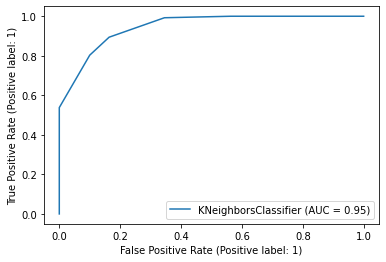

In [21]:
plot_roc_curve(knn, X_train, y_train)

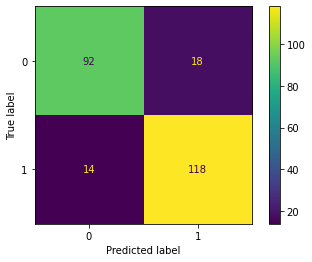

In [22]:
plot_confusion_matrix(knn, X_train, y_train)

In [23]:
cv_before = cross_val_score(knn, X_train, y_train, cv=5).mean()
cv_before

0.810034013605442

# HyperParameter Tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
params = {'n_neighbors' : list(np.arange(1,21)),
         'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [26]:
knn1 = KNeighborsClassifier()

In [27]:
RSV = RandomizedSearchCV(knn1, param_distributions=params, cv=5, n_iter=10, n_jobs=-1, verbose=2, random_state=2)

In [28]:
RSV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....algorithm=auto, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=14, wei

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   random_state=2, verbose=2)

In [29]:
RSV.best_estimator_

KNeighborsClassifier(algorithm='brute', n_neighbors=10)

In [30]:
RSV.best_params_

{'weights': 'uniform', 'n_neighbors': 10, 'algorithm': 'brute'}

In [31]:
RSV.best_score_

0.83078231292517

#### After tuning the hyperparameters, the best CV score is 0.83

In [32]:
knn_tuned = KNeighborsClassifier(weights= 'uniform', n_neighbors= 10, algorithm= 'brute')

In [33]:
cv_after = cross_val_score(knn_tuned, X_train, y_train, cv=5).mean()
cv_after

0.83078231292517

In [34]:
print("CV Score before HyperParameter tuning=", cv_before)
print("CV Score after HyperParameter tuning=", cv_after)

CV Score before HyperParameter tuning= 0.810034013605442
CV Score after HyperParameter tuning= 0.83078231292517
